- Dog & Ghost > quickdraw rnn model
- Pinhole xray > images MURA data
- ZX81 FlightSim > vector map data
- GDEM > RADAR > NOAA data 
- HFB > eevorg > nb zebrastack eevorg
- Fusion > nb zebrastack shifter ct mr
- theWheel
- ALGT
- dH


Hexagonal landmark placement
Self-position zebrastack


In [1]:
from typing import List
from itertools import islice

def sum_neighbors(prev:List[int]):
    if len(prev) == 1:
        return [prev[0]]*2
    return [prev[0] + prev[1]*2] \
        + [sum(prev[n-1:n+1]) for n in range(1,len(prev)-1)] \
        + [sum(prev[-2:-1])] \
        + [prev[-1]]

def adjust_rule(max_value:int, rule:List[int]):
    if max_value >= len(rule):
        return rule + [0] * (max_value-len(rule)+1)
    return rule

def calc_gens(gen:List[int], rule:List[int]):
    while (True):
        yield gen
        sum_gen = sum_neighbors(gen)
        rule = adjust_rule(max(sum_gen), rule)
        gen = list(map(lambda x:rule[x], sum_gen))

In [2]:
rule = [1,1,2,4,0,2,1,3,0]
gen_count = 32
gens = list(islice(calc_gens([1],rule),gen_count))
gens[:10]

[[1],
 [1, 1],
 [4, 1, 1],
 [1, 2, 1, 1],
 [2, 4, 4, 1, 1],
 [0, 1, 0, 2, 1, 1],
 [2, 1, 1, 2, 4, 1, 1],
 [0, 4, 2, 4, 1, 2, 1, 1],
 [0, 0, 1, 1, 2, 4, 4, 1, 1],
 [1, 1, 1, 2, 4, 1, 0, 2, 1, 1]]

In [3]:
zoo = {}
zoo[tuple(rule)] = gens
from pprint import pprint
pprint({key:value[:10] for key,value in zoo.items()})

{(1, 1, 2, 4, 0, 2, 1, 3, 0): [[1],
                               [1, 1],
                               [4, 1, 1],
                               [1, 2, 1, 1],
                               [2, 4, 4, 1, 1],
                               [0, 1, 0, 2, 1, 1],
                               [2, 1, 1, 2, 4, 1, 1],
                               [0, 4, 2, 4, 1, 2, 1, 1],
                               [0, 0, 1, 1, 2, 4, 4, 1, 1],
                               [1, 1, 1, 2, 4, 1, 0, 2, 1, 1]]}


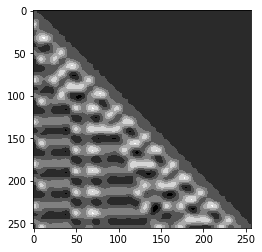

In [4]:
%matplotlib inline
from scipy import ndimage
import matplotlib.pyplot as plt

def make_gens_square(gens):
    # max_width = max([len(row) for row in gens])
    return [(row + [0]*(gen_count - len(row)))[:gen_count] for row in gens]

def show_zoom(gens, axs):
    img = make_gens_square(gens)
    img = ndimage.zoom(img, 8.0)
    axs.imshow(img, cmap='gray')

fig, axs = plt.subplots()
show_zoom(gens, axs)

In [5]:
value2char = ['0','1','2','3','4','5','6','7','8','9','0','a','b','c','d','e','f']
rule2fn = lambda rule: ''.join([value2char[v] for v in rule])
rule2fn(rule)

'112402130'

E:\Data\zebtrastack_temp\eevorg


Lossy conversion from int32 to uint8. Range [-1, 3]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 6]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert

Lossy conversion from int32 to uint8. Range [-1, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 6]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 3]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 4]. Conve

Lossy conversion from int32 to uint8. Range [0, 3]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 6]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 4]. Conv

Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 3]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 6]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 6]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 3]. Conver

Lossy conversion from int32 to uint8. Range [-1, 3]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 6]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 6]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 6]. Conver

Lossy conversion from int32 to uint8. Range [-1, 3]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 6]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 4]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 5]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1, 4]. Conver

[2, 0, 1, 4, 0, 1, 1, 3, 0, 1, 1, 1]
6
15


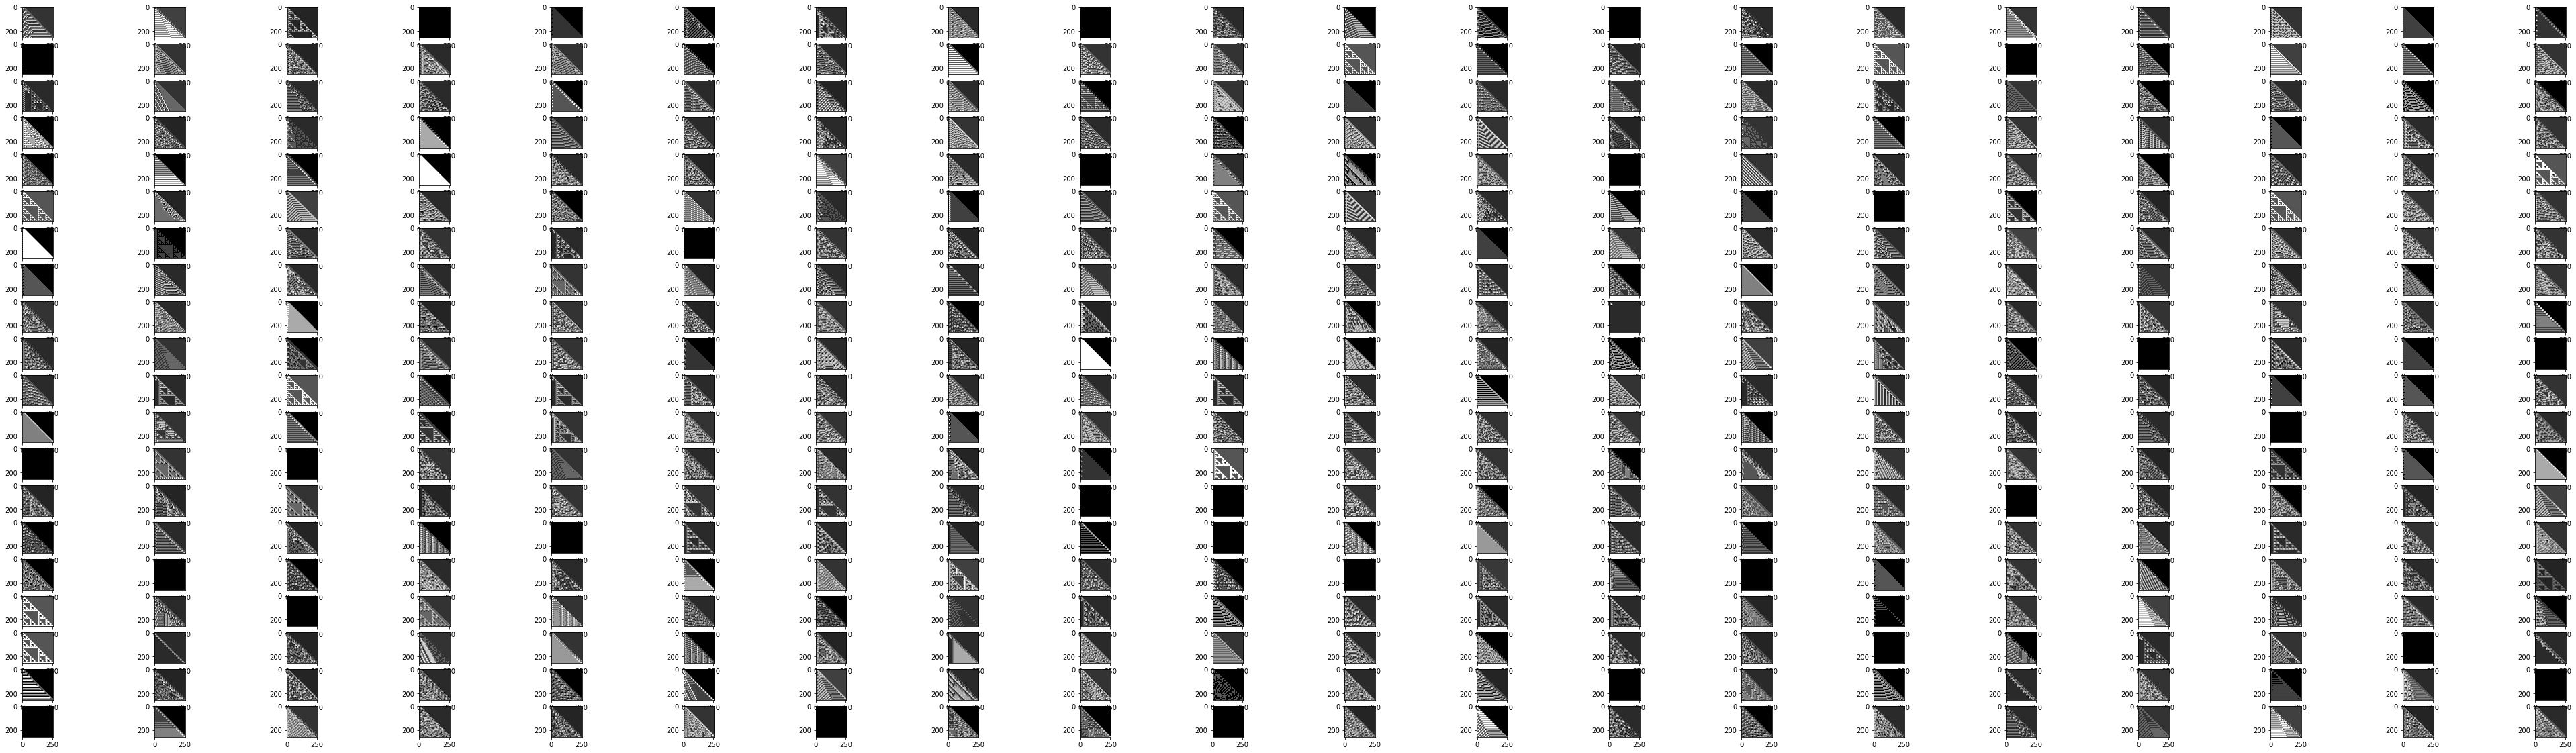

In [13]:
import random
import os
from pathlib import Path
import imageio
from skimage import img_as_ubyte

alpha, beta = 2.0, 5.0
use_beta = False
png_location = Path(os.environ['DATA_TEMP']) / 'eevorg'
png_location.mkdir(parents=True, exist_ok=True)
print(png_location)

def mutate(rule:List[int]):
    pos = \
        int(float(len(rule)) * random.betavariate(alpha, beta)) \
            if use_beta else random.randint(0,len(rule)+1)
        
    if pos > len(rule)-1:
        return rule + [1]
    
    rule[pos] = abs(rule[pos]+random.choice([-1,1]))
    return rule

# using the variable axs for multiple Axes
fig, axs = plt.subplots(20, 20, figsize=(70,20))
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        show_zoom(gens, axs[row][col])
        # randomly pick a rule from the zoo
        rule = list(random.choice(list(zoo.keys())))
        rule = mutate(rule)
        gens = list(islice(calc_gens([1,0],rule),gen_count))
        zoo[tuple(rule)] = gens
        if png_location:     
            fname = (png_location / rule2fn(rule)).with_suffix('.png')
            # print(fname)
            img = make_gens_square(gens)
            img = ndimage.zoom(img, 4.0)
            # img = img_as_ubyte(img * 16)
            # print(img.shape)
            imageio.imwrite(fname, img)
            
print(rule)
print(max([max(list(r)) for r in zoo.keys()]))
print(max([len(r) for r in zoo.keys()]))

In [ ]:
# write out to png files
len(zoo)

In [ ]:
import math

def generate_grid(spacing=16, across=16, thickness=3):
    solid_line = [1]*spacing*across
    line_with_grids = ([1]*thickness + [0]*(spacing-thickness)) * across
    full_block = [solid_line]*thickness + [line_with_grids] * (spacing-thickness)
    return full_block * across

def bulb_func(width, out_at):
    out_at = (out_at[0] + 10.0, out_at[1] - width / 2.0)
    out_at = (0.5 * out_at[0], (0.1 * out_at[1]*math.pow(out_at[0]*0.01,5)))
    out_at = (out_at[0], out_at[1] + width / 2.0)
    return out_at            

# plt.figure(figsize = (10,10))
fig, axs = plt.subplots(1,2, figsize = (20,10))
grid = np.array(generate_grid())
width = grid.shape[0]
axs[0].imshow(generate_grid(), cmap='gray')
axs[1].imshow(geometric_transform(grid, 
                                  lambda c:bulb_func(width,c)), 
              cmap='gray', interpolation='bicubic')